In [1]:
import os.path
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = '../../multiplex_embeddings_data/'
datasets_layer_description = {  # {dataset: [layer_1 description, layer_2 description, ...]}
    'Air_Train': [
        'Air network',
        'Train network',
    ],
    'arXiv': [
        'physics.bioph category',
        'cond-mat.disnn category',
        'physics.soc-ph',
        'physics.data-an category',
        'math.OC category',
        'cond-mat.stat-mech category',
        'q-bio.MN category',
        'cs.SI category',
    ],
    'C. Elegans Connectomme': [
        'Electric',
        'Chemical Monadic',
        'Chemical Polyadic',
    ],
    'Drosophila Melanogaster': [  # meh
        'suppressive genetic interaction',
        'additive genetic interaction',
    ],
    'Human Brain': [
        'structural brain network',
        'functional brain network',
    ],
    'IPv4_IPv6 Internet': [  # meh
        'IPv4 topology',
        'IPv6 topology',
    ],
    'Physicians': [
        'advice',
        'discussion',
        'friendship',
    ],
    'Rattus': [  # meh
        'physical association',
        'direct interaction',
    ],
    'SacchPomb': [
        'direct interaction',
        'colocalization',
        'physical association',
        'synthetic genetic interaction',
        'association',
    ],
}
dataset_names = list(datasets_layer_description.keys())
datasets_layer_description, dataset_names

({'Air_Train': ['Air network', 'Train network'],
  'arXiv': ['physics.bioph category',
   'cond-mat.disnn category',
   'physics.soc-ph',
   'physics.data-an category',
   'math.OC category',
   'cond-mat.stat-mech category',
   'q-bio.MN category',
   'cs.SI category'],
  'C. Elegans Connectomme': ['Electric',
   'Chemical Monadic',
   'Chemical Polyadic'],
  'Drosophila Melanogaster': ['suppressive genetic interaction',
   'additive genetic interaction'],
  'Human Brain': ['structural brain network', 'functional brain network'],
  'IPv4_IPv6 Internet': ['IPv4 topology', 'IPv6 topology'],
  'Physicians': ['advice', 'discussion', 'friendship'],
  'Rattus': ['physical association', 'direct interaction'],
  'SacchPomb': ['direct interaction',
   'colocalization',
   'physical association',
   'synthetic genetic interaction',
   'association']},
 ['Air_Train',
  'arXiv',
  'C. Elegans Connectomme',
  'Drosophila Melanogaster',
  'Human Brain',
  'IPv4_IPv6 Internet',
  'Physicians',
  'Ra

In [3]:
def load_dataset(dataset_name):
    print(f'Loading {dataset_name}')
    path = os.path.join(data_path, dataset_name)
    layer_paths = [os.path.join(path, f'l_{i}.txt')
                  for i in range(1, len(datasets_layer_description[dataset_name]) + 1)]
    G = [nx.read_edgelist(layer_path, create_using=nx.DiGraph) for layer_path in layer_paths]
    return G

In [15]:
def graph_stats(G):
    fig, ax = plt.subplots(nrows=len(G), ncols=3, figsize=(12, 3 * len(G)))
    for i, g in enumerate(G):
        print(f'Layer {i + 1}:')
        print(f'  Size: {len(g)}')
        print(f'  Edges: {len(g.edges)}')

        sorted_nodes = sorted(int(n) for n in g.nodes)
        mn, mx = sorted_nodes[0], sorted_nodes[-1]
        if sorted_nodes == list(range(mn, mx + 1)):
            print(f'  Nodes are labeled through {mn}:{mx}')
        else:
            gaps = [n for n in range(mn, mx + 1) if n not in sorted_nodes]
            print(f'  Nodes are labeled through {mn}:{mx} with {len(gaps)} gaps {gaps}')

        degree_sequence = sorted((d for n, d in g.degree()), reverse=True)
        dmax = max(degree_sequence)
        
        ax[i, 0].set_title('Degree distribution')
        ax[i, 0].bar(*np.unique(degree_sequence, return_counts=True), width=.8)

        ax[i, 1].set_title('Degree distribution (log)')
        ax[i, 1].hist(degree_sequence, bins=np.logspace(np.log10(1), np.log10(len(g)), num=len(g)), rwidth=.8)
        # ax[i, 1].hist(degree_sequence, bins=len(g), rwidth=.8)
        ax[i, 1].set_xscale('log')
        ax[i, 1].set_yscale('log')
        # ax2.plot(np.exp(np.arange(1, np.log10(len(G)))), 1000 - 2.5 * np.exp(np.arange(1, np.log10(len(G)))))

        if len(g) < 1000:
            ax[i, 2].set_title('Graph')
            # gcc = g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])
            pos = nx.spring_layout(g, seed=10396953)
            nx.draw_networkx_nodes(g, pos, ax=ax[i, 2], node_size=20)
            nx.draw_networkx_edges(g, pos, ax=ax[i, 2], alpha=.4, arrows=True)
            ax[i, 2].set_axis_off()

    fig.tight_layout()

Loading SacchPomb
Layer 1:
  Size: 936
  Edges: 1332
  Nodes are labeled through 1:4078 with 3142 gaps [16, 17, 18, 21, 30, 35, 36, 38, 39, 40, 41, 42, 43, 51, 58, 59, 65, 67, 71, 72, 74, 75, 80, 83, 87, 88, 89, 103, 107, 110, 111, 113, 117, 118, 122, 123, 126, 130, 131, 133, 134, 139, 146, 148, 149, 150, 161, 164, 169, 172, 181, 186, 188, 195, 198, 200, 206, 211, 212, 213, 214, 215, 217, 219, 230, 237, 239, 240, 242, 246, 247, 248, 249, 254, 255, 256, 261, 262, 264, 265, 269, 270, 271, 272, 277, 282, 284, 286, 292, 293, 295, 296, 297, 299, 302, 304, 306, 307, 308, 310, 311, 313, 325, 329, 330, 333, 334, 335, 337, 338, 343, 347, 348, 356, 358, 361, 362, 364, 371, 372, 376, 377, 379, 381, 386, 387, 389, 391, 398, 399, 403, 405, 406, 409, 411, 412, 413, 414, 415, 416, 417, 419, 420, 421, 422, 426, 427, 438, 439, 440, 447, 448, 452, 454, 455, 456, 457, 458, 460, 463, 464, 466, 467, 469, 470, 471, 477, 478, 479, 480, 481, 483, 484, 485, 486, 491, 494, 496, 499, 501, 503, 504, 506, 507, 517

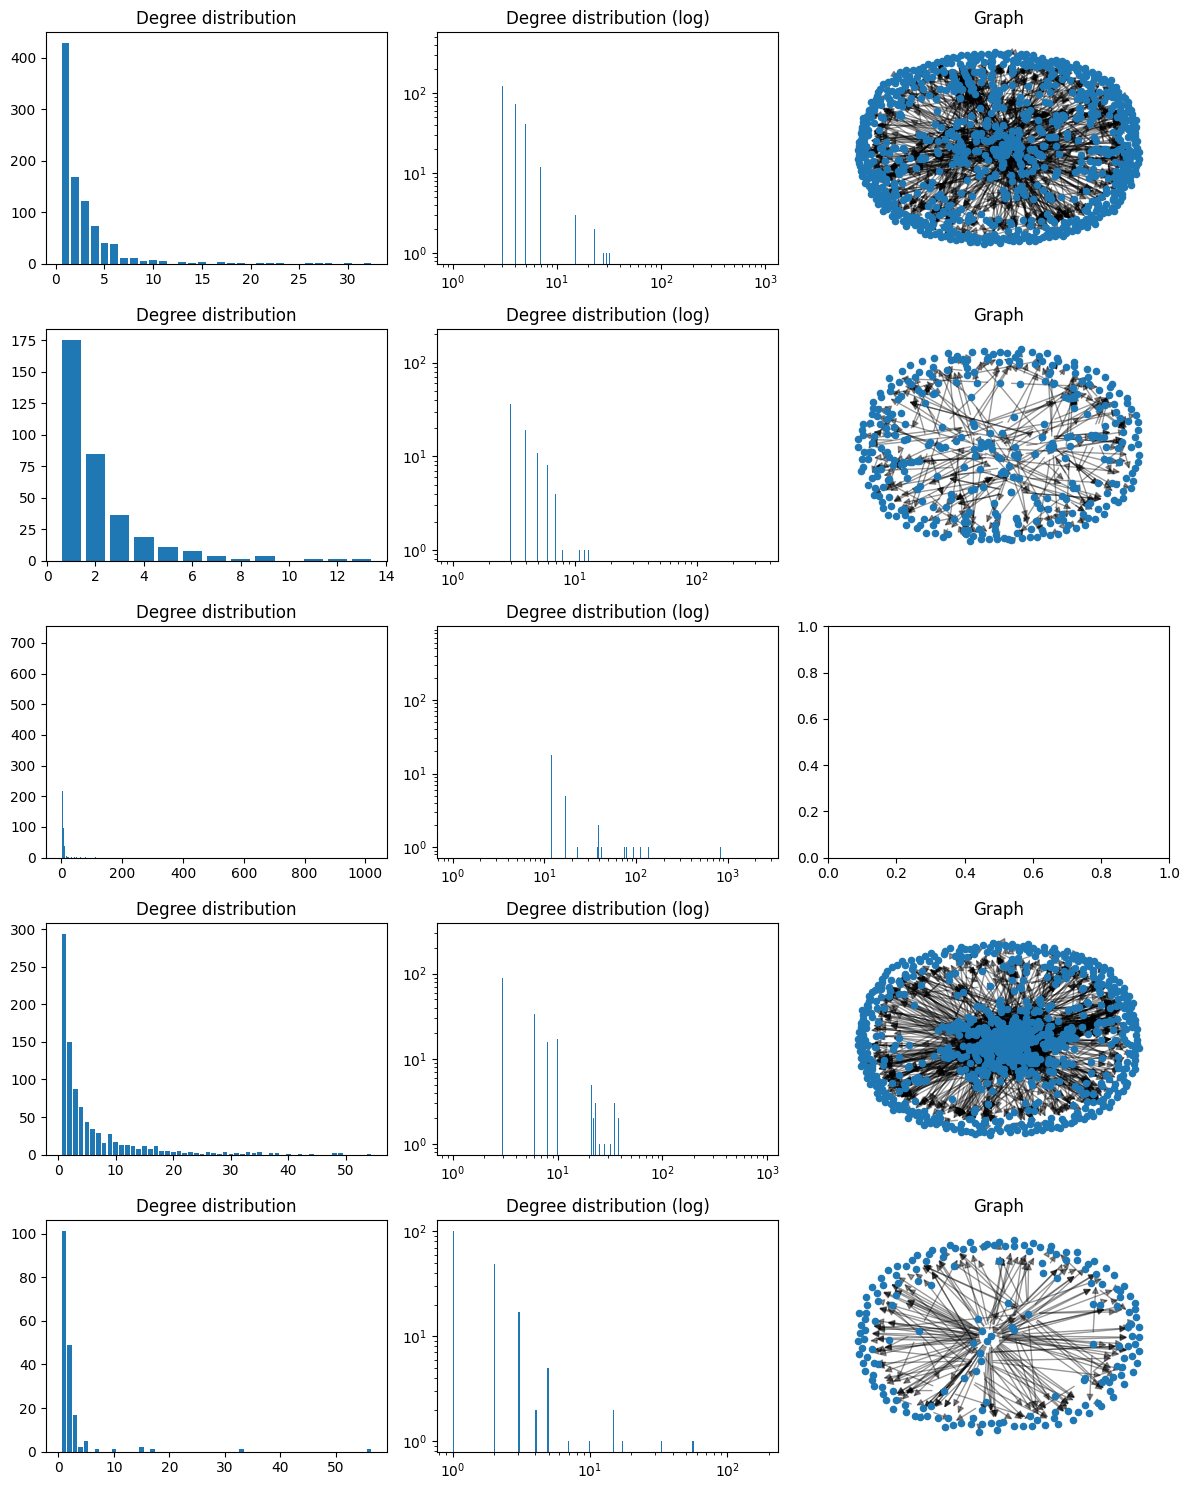

In [17]:
G = load_dataset(dataset_names[8])
graph_stats(G)